# 1. Introduction
This project focuses on **financial risk management** using a diversified ETF portfolio of equities (SPY), bonds (IEF), and gold (GLD). The analysis evaluates the portfolio’s risk through historical simulation, parametric (Gaussian) Value-at-Risk (VaR), Expected Shortfall (ES), rolling backtests, and stress scenarios such as the COVID-19 crash and 2022 inflation selloff.  

The main goal is to demonstrate practical applications of quantitative risk metrics in portfolio management, while highlighting the limitations and potential improvements for future work.

---

# 2. Tools Used
- **Python (Google Colab)** for interactive coding and visualization  
- **yfinance** for market data (ETF adjusted close prices)  
- **pandas & numpy** for data handling and statistical calculations  
- **scipy.stats** for parametric VaR modeling  
- **matplotlib & plotly** for visualization  
- **rich** for styled tabular/console output  
- **tabulate** for tabular summaries  

---

# 3. Pros
- Easy access to financial data through free APIs (Yahoo Finance).  
- Demonstrates multiple risk measures: VaR, ES, max drawdown, rolling volatility.  
- Backtesting (Kupiec test) provides statistical validation of model performance.  
- Visualizations make interpretation intuitive.  
- Stress scenarios help connect quantitative results to real-world events.  

---

# 4. Cons
- ETF proxies may not perfectly replicate broader asset classes.  
- Historical methods assume the past will resemble the future.  
- Gaussian VaR underestimates fat-tail risks.  
- Daily returns ignore intraday volatility and tail dynamics.  
- Results are sensitive to window length and confidence level selection.  

---

# 5. Fusion of Methods
This project **fuses multiple approaches**:  
- **Historical VaR/ES** for nonparametric, data-driven risk.  
- **Gaussian VaR** for simplicity and parametric comparison.  
- **Kupiec backtest** to statistically validate VaR reliability.  
- **Drawdown analysis** to capture investor experience.  
- **Stress testing** to reflect known extreme market conditions.  

---

# 6. Limitations
- Reliance on Yahoo Finance data, which may contain adjustments or missing values.  
- VaR is not coherent (fails subadditivity); ES is more robust but harder to backtest.  
- Kupiec test only checks frequency, not clustering of exceptions.  
- Does not include volatility modeling (e.g., GARCH, EWMA).  
- Simplified portfolio weights (fixed, static allocation).  

---

# 7. What Could Be Done Better
- Use **cleaner institutional-grade datasets** (Bloomberg, Refinitiv).  
- Implement **volatility-adjusted VaR** (e.g., GARCH, EWMA).  
- Add **alternative distributions** (t-distribution, Cornish-Fisher expansion) for fatter tails.  
- Expand to **multi-asset portfolios** (commodities, FX, crypto).  
- Include **liquidity and transaction cost modeling**.  

---

# 8. Future Implementations
- **Basel-compliant ES backtesting** at 97.5% confidence.  
- **Scenario analysis & Monte Carlo simulation** for forward-looking stress tests.  
- **Dynamic portfolio weights** (momentum, risk-parity).  
- **Machine learning** for regime detection and tail-event prediction.  
- **Integration into a dashboard** (Plotly Dash/Streamlit) for interactive reporting.  

---

# 9. Conclusion
The portfolio (SPY 60%, IEF 30%, GLD 10%) shows annualized volatility of 10.28% and max drawdown of -23.13% over 2010-01-04→2025-09-10

At 95% confidence:  
Historical VaR ≈ 1.02% and ES ≈ 1.49% (daily).

Kupiec backtest indicated whether VaR coverage was statistically valid. Stress scenario analysis captured the magnitude of losses during critical events (e.g., COVID crash, 2022 inflation).  

Overall, this project demonstrates how quantitative risk measures can be applied to portfolio analysis. While VaR remains widely used, ES provides a more coherent measure of tail risk. The combination of statistical modeling, backtesting, and stress testing provides a more holistic framework for risk management.  

---

# 10. References
[1] Yahoo Finance historical data (via yfinance): https://finance.yahoo.com  
[2] yfinance documentation: https://ranaroussi.github.io/yfinance/  
[3] Kupiec, P.H. (1995). *Techniques for Verifying the Accuracy of Risk Measurement Models*. The Journal of Derivatives 3(2):73–84.  
[4] Basel Committee on Banking Supervision (1996). *Backtesting framework & traffic-light approach*. https://www.bis.org/publ/bcbs22.pdf  
[5] Artzner, Delbaen, Eber, Heath (1999). *Coherent Measures of Risk*. Mathematical Finance 9(3):203–228.  
[6] Acerbi & Tasche (2001). *Expected Shortfall: a natural coherent alternative to VaR*. https://arxiv.org/pdf/cond-mat/0104295  
[7] Additional overview of VaR backtesting methods: https://research.manchester.ac.uk/files/60673220/back4.pdf  

**Note:** Parts of this report were formatted and edited with the assistance of ChatGPT for clarity and presentation.


╭─────────────────────── Data ───────────────────────╮
│ Downloading data from Yahoo Finance via yfinance   │
│ Tickers: ['SPY', 'IEF', 'GLD'] | Start: 2010-01-01 │
╰─────────────── Auto-adjusted close ────────────────╯

╭───────────────────────╮
│ Portfolio Risk Report │
╰───────────────────────╯

Portfolio: SPY:60%, IEF:30%, GLD:10%

Sample: 2010-01-04 → 2025-10-13  (3,969 trading days)

             Asset Summary (daily → annualized)             
                                                            
  Asset   Ann. Mean (%)   Ann. Vol (%)     Skew   Kurtosis  
 ────────────────────────────────────────────────────────── 
  SPY            14.502         17.274   -0.334     12.094  
  IEF             2.959          6.662    0.051      2.293  
  GLD             9.070         15.650   -0.365      4.111  
                                                            

      Portfolio Summary      
                             
  Metric              Value  
 ─────────────────────────── 
  Ann. Mean (%)       7.780  
  Ann. Vol (%)       10.287  
  Skew               -0.288  
  Kurtosis            3.735  
  Max Drawdown (%)   -23.13  
                             

                        Portfolio Risk (Full-Sample)                         
             ╷                    ╷                   ╷                      
  Conf Level │ Hist VaR (daily %) │ Hist ES (daily %) │ Gauss VaR (daily %)  
 ════════════╪════════════════════╪═══════════════════╪═════════════════════ 
  95%        │              1.024 │             1.486 │               1.035  
  99%        │              1.689 │             2.296 │               1.477  
             ╵                    ╵                   ╵

      VaR Backtest (Kupiec POF) at 95%       
                                             
  Metric                              Value  
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  Rolling Window                        252  
  Forecasted Days (N)                 3,716  
  Exceptions (x)                        200  
  Observed Exception Rate (pi_hat)   5.382%  
  Expected Exception Rate (p0)        5.00%  
  LR Statistic                        1.116  
  p-value (χ²(1))                    0.2908

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Kupiec Interpretation: At 5% significance, test PASS. A PASS means the exception rate is statistically          │
│ consistent with the model's expected rate; a FAIL suggests miscalibration (too many or too few breaches).       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

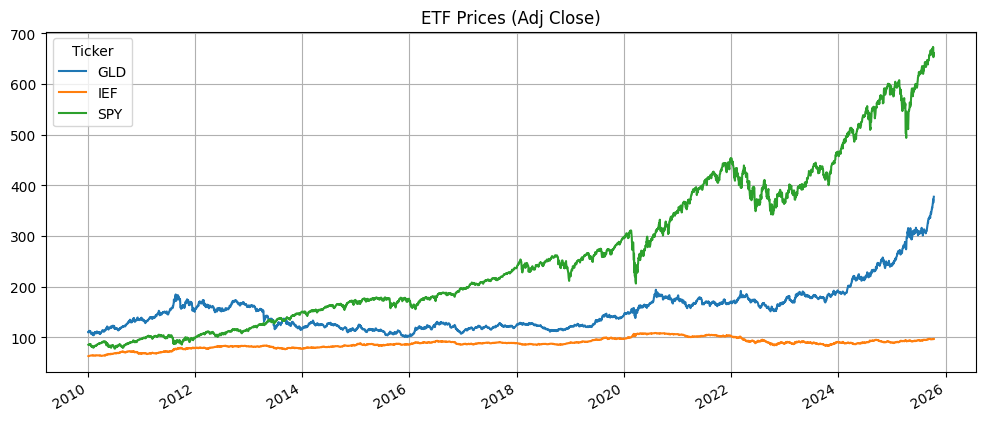

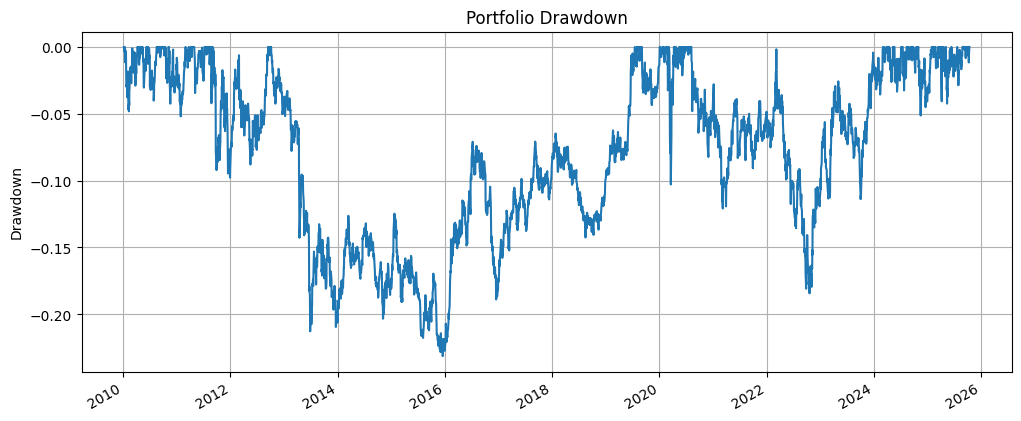

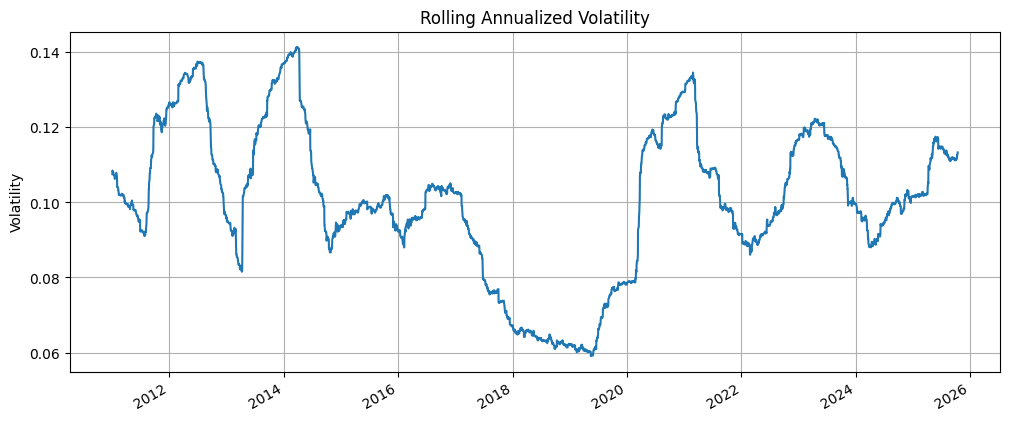

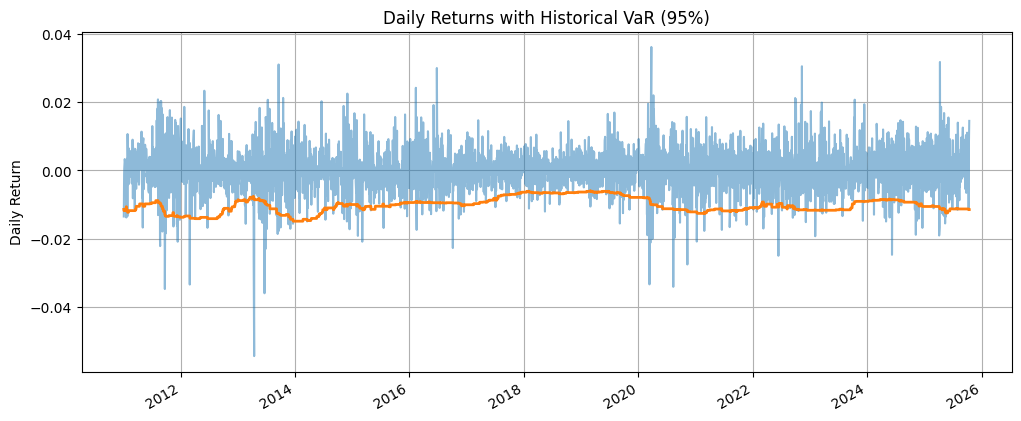

                      Stress Scenarios (Portfolio)                      
                                                                        
  Period              Window                  Total Return   Worst Day  
 ────────────────────────────────────────────────────────────────────── 
  COVID Crash         2020-02-15→2020-03-31         -0.39%      -3.33%  
  Inflation Selloff   2022-01-01→2022-10-31        -13.23%      -2.50%

╭────────────────────────────────────────────────── Conclusion ───────────────────────────────────────────────────╮
│ Summary:                                                                                                        │
│ • Your SPY:60%, IEF:30%, GLD:10% portfolio shows annualized volatility of 10.29% and max drawdown of -23.13%    │
│ over 2010-01-04→2025-10-13.                                                                                     │
│ • At 95% confidence, Historical VaR ≈ 1.02% and ES ≈ 1.49% (daily).                                             │
│ • Kupiec POF backtest at 95%: x=200 exceptions over N=3716 days (observed 5.38% vs expected 5.00%);             │
│ p-value=0.2908.                                                                                                 │
│ Interpretation:                                                                                                 │
│ • VaR is a threshold; ES (Expected Shortfall) tells you the average of the worst tail losses beyond VaR. ES is  │
│ generally a more informative tail risk measure.                                                                 │
│ • If the Kupiec test passes (p>0.05), your historical VaR coverage is statistically okay; if it fails, consider │
│ recalibrations (longer window, volatility models, heavier-tail distributions).                                  │
│ Limitations:                                                                                                    │
│ • Yahoo Finance data and ETF proxies are great for coursework but not a substitute for clean, trade-level P&L.  │
│ • Historical methods assume the past is informative for the near future; regime shifts can break that.          │
│ • Gaussian VaR underestimates fat tails; prefer historical or heavy-tail parametrics for stressier assets.      │
│ Extensions:                                                                                                     │
│ • Try EWMA or GARCH volatility, Cornish-Fisher VaR, or switch to ES-based backtesting (Basel prefers ES at      │
│ 97.5% for market risk).                                                                                         │
│ • Swap tickers (e.g., add international equity, TIPs, commodities) and examine diversification effects.         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ References                                                                                                      │
│ [1] Yahoo Finance historical data (accessed via yfinance): https://finance.yahoo.com/quote/SPY/history/ ;       │
│ https://finance.yahoo.com/quote/SPY/                                                                            │
│ [2] yfinance docs (educational use disclosure): https://ranaroussi.github.io/yfinance/                          │
│ [3] Kupiec, P.H. (1995). Techniques for Verifying the Accuracy of Risk Measurement Models. The Journal of       │
│ Derivatives 3(2):73–84. SSRN: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=6697                          │
│ [4] Basel Committee on Banking Supervision (1996). Backtesting framework & traffic-light approach.              │
│ https://www.bis.org/publ/bcbs22.pdf                                                                             │
│ [5] Artzner, Delbaen, Eber, Heath (1999). Coherent Measures of Risk. Mathematical Finance 9(3):203–228.         │
│ (preprint) https://people.math.ethz.ch/~delbaen/ftp/preprints/CoherentMF.pdf                                    │
│ [6] Acerbi & Tasche (2001). Expected Shortfall: a natural coherent alternative to VaR. (preprint)               │
│ https://arxiv.org/pdf/cond-mat/0104295                                                                          │
│ [7] Additional overview of VaR backtesting methods (review):                                                    │
│ https://research.manchester.ac.uk/files/60673220/back4.pdf                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [ ]:
# ========== USER SETTINGS ==========
TICKERS = ['SPY', 'IEF', 'GLD']      # ETFs: Equities / Bonds / Gold
WEIGHTS = [0.60, 0.30, 0.10]         # must sum to 1.0
START_DATE = '2010-01-01'            # data start
CONF_LEVELS = [0.95, 0.99]           # VaR/ES levels to report
ROLL_WINDOW = 252                    # rolling window for risk (≈1 trading year)
SEED = 42                            # for reproducibility where randomness is used
# ===================================

!pip -q install yfinance rich plotly scipy numpy pandas matplotlib tabulate > /dev/null

import warnings, math, textwrap
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import yfinance as yf
from scipy import stats
import matplotlib.pyplot as plt

from rich.console import Console
from rich.table import Table
from rich.panel import Panel
from rich import box

import plotly.express as px

np.random.seed(SEED)
console = Console()

# Basic validation
assert abs(sum(WEIGHTS) - 1.0) < 1e-6, "WEIGHTS must sum to 1.0"
assert len(TICKERS) == len(WEIGHTS), "TICKERS and WEIGHTS must be same length"

# ========== DATA DOWNLOAD ==========
console.print(Panel.fit("[bold cyan]Downloading data from Yahoo Finance via yfinance[/bold cyan]\n"
                        f"Tickers: {TICKERS} | Start: {START_DATE}",
                        border_style="cyan", title="Data", subtitle="Auto-adjusted close"))

data = yf.download(TICKERS, start=START_DATE, auto_adjust=True, progress=False)

# yfinance returns a DataFrame with columns as a MultiIndex; for Close we'll select column if present
if isinstance(data.columns, pd.MultiIndex):
    prices = data['Close'].copy()
else:
    prices = data.copy()

# Drop rows with all-NaNs (start-up NaNs)
prices = prices.dropna(how='all')
missing_cols = [t for t in TICKERS if t not in prices.columns]
assert not missing_cols, f"Missing expected tickers in downloaded data: {missing_cols}"

# Daily arithmetic returns
rets = prices.pct_change().dropna()

# Portfolio returns
w = np.array(WEIGHTS)
port_rets = (rets @ w).rename("Portfolio").dropna()

# Helper: trading-year scale
TRADING_DAYS = 252

# ========== CORE FUNCTIONS ==========
def max_drawdown(series: pd.Series):
    """Compute drawdowns and max drawdown (on a cumulative wealth index)."""
    wealth = (1 + series).cumprod()
    roll_max = wealth.cummax()
    drawdown = wealth/roll_max - 1.0
    return drawdown, drawdown.min()

def hist_var(series: pd.Series, alpha: float):
    """Historical VaR at confidence alpha. Positive number = loss threshold."""
    q = series.quantile(1 - alpha)
    return -float(q)

def hist_es(series: pd.Series, alpha: float):
    """Historical Expected Shortfall (a.k.a. CVaR) at confidence alpha. Positive number."""
    cutoff = series.quantile(1 - alpha)
    tail = series[series <= cutoff]
    if len(tail) == 0:
        return float('nan')
    return -float(tail.mean())

def gauss_var(series: pd.Series, alpha: float):
    """Parametric (Gaussian) VaR at confidence alpha using mean & std of returns."""
    mu, sigma = series.mean(), series.std(ddof=1)
    z = stats.norm.ppf(1 - alpha)
    return -(mu + sigma*z)

def kupiec_pof_test(exceptions: np.ndarray, p0: float):
    """
    Kupiec (1995) Proportion of Failures (POF) test.
    exceptions: boolean array where True = VaR breach (loss exceeded VaR)
    p0: expected exception rate (e.g., 0.05 for 95% VaR)
    Returns: (LR statistic, p_value, x breaches, N observations, pi_hat)
    """
    N = len(exceptions)
    x = int(exceptions.sum())
    if N == 0:
        return np.nan, np.nan, 0, 0, np.nan
    pi_hat = x / N
    # Handle zero/one edge cases safely
    pi_hat = min(max(pi_hat, 1e-12), 1 - 1e-12)
    p0 = min(max(p0, 1e-12), 1 - 1e-12)
    ll_null = x * math.log(p0) + (N - x) * math.log(1 - p0)
    ll_alt  = x * math.log(pi_hat) + (N - x) * math.log(1 - pi_hat)
    LR = -2 * (ll_null - ll_alt)
    pval = 1 - stats.chi2.cdf(LR, df=1)
    return LR, pval, x, N, pi_hat


# ========== SUMMARY STATS ==========
def annualize_vol(daily_std):
    return daily_std * math.sqrt(TRADING_DAYS)

asset_stats = pd.DataFrame({
    'Ann. Mean (%)': rets.mean()*TRADING_DAYS*100,
    'Ann. Vol (%)': rets.std(ddof=1).apply(annualize_vol)*100,
    'Skew': rets.skew(),
    'Kurtosis': rets.kurtosis()
}).round(3)

port_stats = pd.Series({
    'Ann. Mean (%)': port_rets.mean()*TRADING_DAYS*100,
    'Ann. Vol (%)': annualize_vol(port_rets.std(ddof=1))*100,
    'Skew': port_rets.skew(),
    'Kurtosis': port_rets.kurtosis()
}).round(3)

dd_series, mdd = max_drawdown(port_rets)

# ========== POINT-IN-TIME RISK (FULL-SAMPLE) ==========
risk_rows = []
for a in CONF_LEVELS:
    risk_rows.append({
        'Level': f"{int(a*100)}%",
        'Hist VaR (daily %)': hist_var(port_rets, a)*100,
        'Hist ES (daily %)':  hist_es(port_rets, a)*100,
        'Gauss VaR (daily %)': gauss_var(port_rets, a)*100
    })
risk_table = pd.DataFrame(risk_rows).set_index('Level').round(3)


# ========== ROLLING VaR + BACKTEST (KUPIEC) ==========
alpha_bt = 0.95
p0 = 1 - alpha_bt

rolling_var = port_rets.rolling(ROLL_WINDOW).apply(lambda x: -np.percentile(x, (1-alpha_bt)*100), raw=True)
# Ex-ante forecast for day t uses data up to t-1 (shift)
var_forecast = rolling_var.shift(1).dropna()
aligned_returns = port_rets.loc[var_forecast.index]

# Exception: realized return < -VaR
exceptions = (aligned_returns < -var_forecast).astype(int).values
LR, pval, x, N, pi_hat = kupiec_pof_test(exceptions.astype(bool), p0=p0)


# ========== PRINT REPORT ==========
console.print(Panel.fit("[bold magenta]Portfolio Risk Report[/bold magenta]", border_style="magenta"))
weights_text = ", ".join([f"{t}:{w:.0%}" for t, w in zip(TICKERS, WEIGHTS)])
console.print(f"[bold]Portfolio:[/bold] {weights_text}")
console.print(f"[bold]Sample:[/bold] {prices.index[0].date()} → {prices.index[-1].date()}  "
              f"({len(prices):,} trading days)")

# Asset stats
tbl = Table(title="Asset Summary (daily → annualized)", box=box.SIMPLE, border_style="cyan")
tbl.add_column("Asset", justify="left", style="bold")
for col in asset_stats.columns:
    tbl.add_column(col, justify="right")
for t in TICKERS:
    row = [t] + [f"{asset_stats.loc[t, c]:,.3f}" for c in asset_stats.columns]
    tbl.add_row(*row)
console.print(tbl)

# Portfolio stats
tblp = Table(title="Portfolio Summary", box=box.SIMPLE, border_style="green")
tblp.add_column("Metric", style="bold")
tblp.add_column("Value", justify="right")
for k, v in port_stats.items():
    tblp.add_row(k, f"{v:,.3f}")
dd_pct = mdd*100
tblp.add_row("Max Drawdown (%)", f"{dd_pct:,.2f}")
console.print(tblp)

# Risk table
risk = Table(title="Portfolio Risk (Full-Sample)", box=box.MINIMAL_DOUBLE_HEAD)
risk.add_column("Conf Level")
risk.add_column("Hist VaR (daily %)", justify="right")
risk.add_column("Hist ES (daily %)", justify="right")
risk.add_column("Gauss VaR (daily %)", justify="right")
for idx, r in risk_table.iterrows():
    risk.add_row(idx, f"{r['Hist VaR (daily %)']:,.3f}",
                 f"{r['Hist ES (daily %)']:,.3f}",
                 f"{r['Gauss VaR (daily %)']:,.3f}")
console.print(risk)

# Backtest table
bt = Table(title=f"VaR Backtest (Kupiec POF) at {int(alpha_bt*100)}%", box=box.SIMPLE_HEAVY)
bt.add_column("Metric", style="bold")
bt.add_column("Value", justify="right")
bt.add_row("Rolling Window", str(ROLL_WINDOW))
bt.add_row("Forecasted Days (N)", f"{N:,}")
bt.add_row("Exceptions (x)", f"{x:,}")
bt.add_row("Observed Exception Rate (pi_hat)", f"{pi_hat:.3%}")
bt.add_row("Expected Exception Rate (p0)", f"{p0:.2%}")
bt.add_row("LR Statistic", f"{LR:.3f}")
bt.add_row("p-value (χ²(1))", f"{pval:.4f}")
console.print(bt)

# Interpret Kupiec
if not np.isnan(pval):
    verdict = ("[green]PASS[/green]" if pval > 0.05 else "[red]FAIL[/red]")
    console.print(Panel.fit(
        f"[bold]Kupiec Interpretation:[/bold] At 5% significance, test {verdict}. "
        "A PASS means the exception rate is statistically consistent with the model's expected rate; "
        "a FAIL suggests miscalibration (too many or too few breaches).",
        border_style="white"))

# ========== PLOTS ==========
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['axes.grid'] = True

# 1) Prices
prices.plot(title="ETF Prices (Adj Close)")
plt.xlabel("")
plt.show()

# 2) Portfolio drawdown
dd_series.plot(title="Portfolio Drawdown")
plt.xlabel("")
plt.ylabel("Drawdown")
plt.show()

# 3) Rolling annualized volatility
port_rets.rolling(ROLL_WINDOW).std(ddof=1).mul(np.sqrt(TRADING_DAYS)).plot(title="Rolling Annualized Volatility")
plt.ylabel("Volatility")
plt.xlabel("")
plt.show()

# 4) VaR breaches
fig = pd.DataFrame({
    "Return": aligned_returns,
    "VaR (95%)": -var_forecast,
}).dropna()

ax = fig['Return'].plot(kind='line', alpha=0.5, title="Daily Returns with Historical VaR (95%)")
fig['VaR (95%)'].plot(ax=ax, linewidth=2)
plt.ylabel("Daily Return")
plt.xlabel("")
plt.show()

# ========== STRESS SNAPSHOTS ==========
# Simple stress windows: COVID crash (2020-02-15 to 2020-03-31) and 2022 inflation selloff (2022-01-01 to 2022-10-31)
def window_perf(s, start, end):
    seg = s.loc[start:end]
    total = (1 + seg).prod() - 1
    worst = seg.min()
    return total, worst

stress_cases = [
    ("COVID Crash", "2020-02-15", "2020-03-31"),
    ("Inflation Selloff", "2022-01-01", "2022-10-31")
]

st = Table(title="Stress Scenarios (Portfolio)", box=box.SIMPLE)
st.add_column("Period", style="bold")
st.add_column("Window")
st.add_column("Total Return", justify="right")
st.add_column("Worst Day", justify="right")
for name, sdt, edt in stress_cases:
    tot, worst = window_perf(port_rets, sdt, edt)
    st.add_row(name, f"{sdt}→{edt}", f"{tot*100:,.2f}%", f"{worst*100:,.2f}%")
console.print(st)

# ========== AUTO CONCLUSION ==========
def pct(x):
    return f"{x*100:,.2f}%"

conclusion = f"""
Summary:
• Your {weights_text} portfolio shows annualized volatility of {port_stats['Ann. Vol (%)']:.2f}% and max drawdown of {dd_pct:.2f}% over {prices.index[0].date()}→{prices.index[-1].date()}.
• At 95% confidence, Historical VaR ≈ {risk_table.loc['95%', 'Hist VaR (daily %)']:.2f}% and ES ≈ {risk_table.loc['95%', 'Hist ES (daily %)']:.2f}% (daily).
• Kupiec POF backtest at 95%: x={x} exceptions over N={N} days (observed {pi_hat:.2%} vs expected {p0:.2%}); p-value={pval:.4f}.
Interpretation:
• VaR is a threshold; ES (Expected Shortfall) tells you the average of the worst tail losses beyond VaR. ES is generally a more informative tail risk measure.
• If the Kupiec test passes (p>0.05), your historical VaR coverage is statistically okay; if it fails, consider recalibrations (longer window, volatility models, heavier-tail distributions).
Limitations:
• Yahoo Finance data and ETF proxies are great for coursework but not a substitute for clean, trade-level P&L.
• Historical methods assume the past is informative for the near future; regime shifts can break that.
• Gaussian VaR underestimates fat tails; prefer historical or heavy-tail parametrics for stressier assets.
Extensions:
• Try EWMA or GARCH volatility, Cornish-Fisher VaR, or switch to ES-based backtesting (Basel prefers ES at 97.5% for market risk).
• Swap tickers (e.g., add international equity, TIPs, commodities) and examine diversification effects.
"""
console.print(Panel.fit(textwrap.dedent(conclusion).strip(), border_style="magenta", title="Conclusion"))

# ========== REFERENCES ==========
refs = """
[1] Yahoo Finance historical data (accessed via yfinance): https://finance.yahoo.com/quote/SPY/history/ ; https://finance.yahoo.com/quote/SPY/
[2] yfinance docs (educational use disclosure): https://ranaroussi.github.io/yfinance/
[3] Kupiec, P.H. (1995). Techniques for Verifying the Accuracy of Risk Measurement Models. The Journal of Derivatives 3(2):73–84. SSRN: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=6697
[4] Basel Committee on Banking Supervision (1996). Backtesting framework & traffic-light approach. https://www.bis.org/publ/bcbs22.pdf
[5] Artzner, Delbaen, Eber, Heath (1999). Coherent Measures of Risk. Mathematical Finance 9(3):203–228. (preprint) https://people.math.ethz.ch/~delbaen/ftp/preprints/CoherentMF.pdf
[6] Acerbi & Tasche (2001). Expected Shortfall: a natural coherent alternative to VaR. (preprint) https://arxiv.org/pdf/cond-mat/0104295
[7] Additional overview of VaR backtesting methods (review): https://research.manchester.ac.uk/files/60673220/back4.pdf
"""
console.print(Panel.fit("[bold]References[/bold]\n"+refs.strip(), border_style="cyan"))
